---

# Email Classification - Spam vs Real

### Comparing Random Forest vs Naive Bayes Classification Models

The goal of this project is to use Machine Learning to correctly classify emails according to whether or not they are spam. Here, I will be comparing two different models - Random Forest Classification, and Naive Bayes Classification.

The phases of this project are as follows:
- Import libraries
- Import Dataset
- Spam vs Real Visualizations
- Data Cleaning & Feature Engineering
- Create Training & Test Sets
- Model Selection - Random Forest vs Naive Bayes
- Conclusion

---

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Public\\datasets_public\\spam_email\\emails_1.csv')

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
df.keys()

Index(['text', 'spam'], dtype='object')

In [11]:
len(df) # returned 5728

5728

---

## Spam vs Real Visualization

In [12]:
real = df[df['spam']==0]
real

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
spam = df[df['spam']==1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


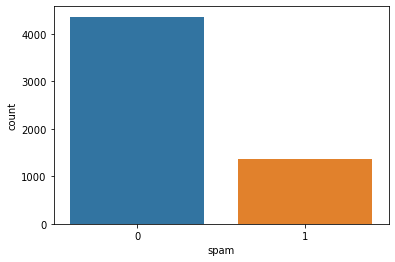

In [21]:
sns.countplot(data=df, x='spam', label='spam vs real')
plt.show()

In [18]:
print('Spam Percentage =', (len(spam)/len(df))*100, '%')

Spam Percentage = 23.88268156424581 %


In [19]:
print('Real Percentage =', (len(real)/len(df))*100, '%')

Real Percentage = 76.11731843575419 %


In our overall dataset, we have approximately 24% Spam, and 76% Real emails.

---

## Data Cleaning / Feature Engineering

##### Create the Count Vectorizer, which converts the email to a matrix of token counts

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df_countvectorizer = vectorizer.fit_transform(df['text'])

In [26]:
print(df_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
df_countvectorizer.shape

(5728, 37303)

In [28]:
# Drop the original text column from the dataframe
df.drop(['text'], axis=1, inplace=True)

# Create the encoded object
encoded_emails = pd.DataFrame(df_countvectorizer.toarray())

# Concatenate the encoded object with the dataframe
df = pd.concat([df, encoded_emails], axis=1)

df.head()

,spam,0,1,2,3,4,5,6,7,8,...,37293,37294,37295,37296,37297,37298,37299,37300,37301,37302
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5724,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5725,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

## Create Training & Test Sets

In [32]:
X = df.drop(['spam'], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,37293,37294,37295,37296,37297,37298,37299,37300,37301,37302
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y = df['spam']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [35]:
X_train.shape

(4582, 37303)

In [36]:
X_test.shape

(1146, 37303)

In [37]:
y_train.shape

(4582,)

In [38]:
y_test.shape

(1146,)

---

## Model Selection - Random Forest vs Naive Bayes

#### Random Forest Classification

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators = 150, criterion='entropy')

In [58]:
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [59]:
# Prediction objects
y_predict_train = randomforest_classifier.predict(X_train)
y_predict_test = randomforest_classifier.predict(X_test)

#### Random Forest Training Results

<AxesSubplot:>

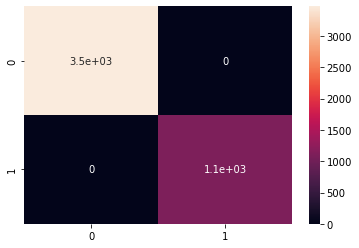

In [60]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [53]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3475
           1       1.00      1.00      1.00      1107

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



#### Random Forest Test Results

<AxesSubplot:>

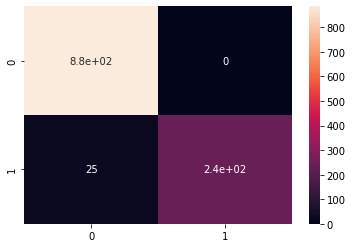

In [61]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [62]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       1.00      0.89      0.94       261

    accuracy                           0.97      1146
   macro avg       0.98      0.94      0.96      1146
weighted avg       0.97      0.97      0.97      1146



Here we observe a 97% model precision when using Random Forest.. now let's try Naive Bayes

#### Naive Bayes Classification

In [63]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

In [64]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [65]:
# Prediction objects
y_predict_train = NB_classifier.predict(X_train)
y_predict_test = NB_classifier.predict(X_test)

#### Naive Bayes Training Results

<AxesSubplot:>

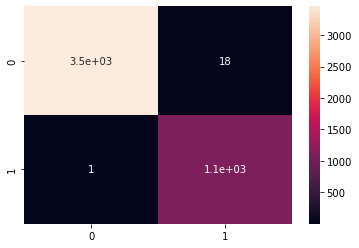

In [66]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [67]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3475
           1       0.98      1.00      0.99      1107

    accuracy                           1.00      4582
   macro avg       0.99      1.00      0.99      4582
weighted avg       1.00      1.00      1.00      4582



#### Naive Bayes Test Results

<AxesSubplot:>

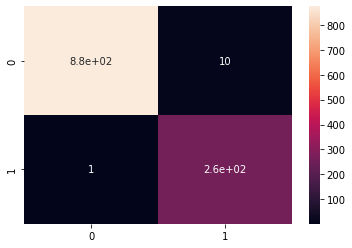

In [69]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [70]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.96      1.00      0.98       261

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



Here we observe a 99% model precision when using Naive Bayes Classification

---

## Conclusion

Naive Bayes Classification was able to achieve a 99% model precision, whereas Random Forest Classification was able to achieve 97%. 

Naive Bayes is the clear winner.